In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
train_data_path="/content/drive/My Drive/data/Glass_Quality_Participants_Data/Train.csv"
test_data_path="/content/drive/My Drive/data/Glass_Quality_Participants_Data/Test.csv"

In [0]:
train_data=pd.read_csv(train_data_path)
test_data=pd.read_csv(test_data_path)

In [74]:
train_data.isnull().sum()

grade_A_Component_1    0
grade_A_Component_2    0
max_luminosity         0
thickness              0
xmin                   0
xmax                   0
ymin                   0
ymax                   0
pixel_area             0
log_area               0
x_component_1          0
x_component_2          0
x_component_3          0
x_component_4          0
x_component_5          0
class                  0
dtype: int64

In [75]:
train_data.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


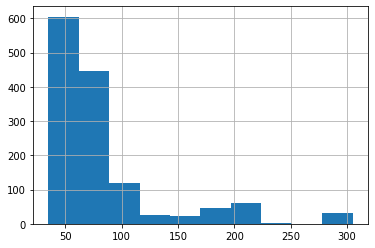

In [76]:
(train_data.thickness).hist()

In [0]:
out=["ymin","thickness","y_max","log_area","pixel_area"]

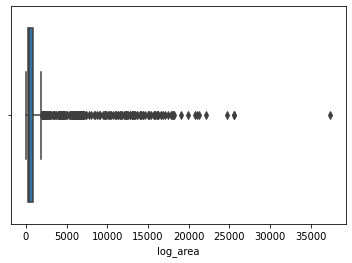

In [78]:
sns.boxplot(train_data.log_area)

In [0]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1:]

In [0]:
from scipy import stats
z=np.abs(stats.zscore(X_train))
threshold=3
outlier_cordinate=np.where(z>threshold)

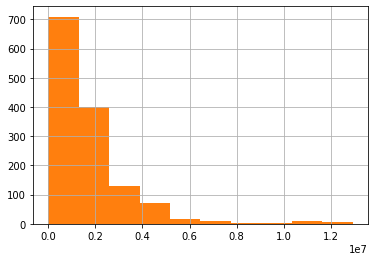

In [81]:

(train_data.ymin).hist()
(X_train.ymin).hist()


In [0]:
mean_each_column=[]
for column in X_train.columns:
  mean_each_column.append(np.mean(X_train[column]))

In [83]:
mean_each_column[0]=0
mean_each_column[1]=1
mean_each_column[10]=0
mean_each_column[11]=0
mean_each_column[12]=0
mean_each_column[13]=0
mean_each_column[14]=0
mean_each_column

[0,
 1,
 137.89322533136965,
 78.97790868924889,
 567.3703976435935,
 614.0324005891016,
 1660107.4337260677,
 1660138.7827687776,
 1903.4027982326952,
 1903.8962396194336,
 0,
 0,
 0,
 0,
 0]

In [0]:
columns_value=X_train.columns
dict_mean_each_column={}

dict_value={}
for i in range(len(columns_value)):
  dict_value[i]=str(columns_value[i])
  dict_mean_each_column[columns_value[i]]=float(mean_each_column[i])



In [85]:
dict_mean_each_column

{'grade_A_Component_1': 0.0,
 'grade_A_Component_2': 1.0,
 'log_area': 1903.8962396194336,
 'max_luminosity': 137.89322533136965,
 'pixel_area': 1903.4027982326952,
 'thickness': 78.97790868924889,
 'x_component_1': 0.0,
 'x_component_2': 0.0,
 'x_component_3': 0.0,
 'x_component_4': 0.0,
 'x_component_5': 0.0,
 'xmax': 614.0324005891016,
 'xmin': 567.3703976435935,
 'ymax': 1660138.7827687776,
 'ymin': 1660107.4337260677}

In [0]:
rows=outlier_cordinate[0]
columns=outlier_cordinate[1]

In [87]:
for i in range(0,len(rows)):
  column=columns[i]
  column=(dict_value[column])
  row=rows[i]
  print(column)
  X_train[str(column)][int(row)]=dict_mean_each_column[column]
  
 

x_component_1
x_component_1
ymin
ymax
pixel_area
log_area
x_component_1
x_component_4
x_component_4
ymin
ymax
x_component_1
pixel_area
log_area
x_component_4
thickness
pixel_area
log_area
pixel_area
log_area
x_component_1
x_component_5
x_component_1
x_component_5
x_component_5
pixel_area
log_area
x_component_1
x_component_5
x_component_1
x_component_1
x_component_1
x_component_5
x_component_1
ymin
ymax
x_component_4
x_component_4
x_component_1
x_component_5
pixel_area
log_area
pixel_area
log_area
x_component_5
max_luminosity
pixel_area
log_area
x_component_1
thickness
x_component_4
x_component_1
x_component_4
x_component_1
ymin
ymax
thickness
thickness
max_luminosity
max_luminosity
x_component_1
x_component_1
ymin
ymax
x_component_1
x_component_4
ymin
ymax
thickness
pixel_area
log_area
max_luminosity
max_luminosity
x_component_1
x_component_5
thickness
x_component_5
x_component_4
pixel_area
log_area
x_component_1
x_component_4
x_component_5
ymin
ymax
pixel_area
log_area
x_component_4
x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
"""for row in outlier_row_thickness:
  X_train.thickness[row]=mean_thickness"""

'for row in outlier_row_thickness:\n  X_train.thickness[row]=mean_thickness'

In [89]:
X_train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.0,1358.000000,1358.000000,1358.0,1358.0
mean,0.406480,0.593520,136.455817,73.610457,567.370398,614.032401,1.471090e+06,1.471114e+06,1425.212813,1425.718654,0.0,0.106038,0.197349,0.0,0.0
std,0.491357,0.491357,16.538623,43.057167,522.013094,500.505513,1.232565e+06,1.232556e+06,2519.525265,2519.536828,0.0,0.308000,0.398145,0.0,0.0
min,0.000000,0.000000,81.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.0,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.0,0.000000,0.000000,0.0,0.0
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.0,0.000000,0.000000,0.0,0.0
75%,1.000000,1.000000,145.000000,79.000000,1041.750000,1064.000000,2.099016e+06,2.097693e+06,915.250000,915.367817,0.0,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,199.000000,225.000000,1692.000000,1717.000000,6.571911e+06,6.570743e+06,13402.000000,13402.547110,0.0,1.000000,1.000000,0.0,0.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler()

In [0]:
X_train_scaled=mmscaler.fit_transform(X_train)

In [92]:
X_train_scaled.shape

(1358, 15)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_train,y_train,random_state=0)

In [94]:
Xtrain.shape

(1018, 15)

In [0]:
from sklearn.linear_model import LogisticRegression
logiRegressor=LogisticRegression()

In [96]:
logiRegressor.fit(Xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred=logiRegressor.predict(Xtest)

In [0]:
from sklearn.metrics import confusion_matrix


In [99]:
confusion_matrix(y_true=ytest,y_pred=y_pred)

array([[214,   4],
       [117,   5]])

In [0]:
from sklearn.tree import DecisionTreeClassifier


In [0]:
dtclassifier=DecisionTreeClassifier(max_depth=6)

In [102]:
dtclassifier.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred=dtclassifier.predict(Xtest)

In [104]:
confusion_matrix(y_true=ytest,y_pred=y_pred)

array([[179,  39],
       [ 54,  68]])

In [0]:
x_train,x_test,y_train,y_test=train_test_split(train_data.iloc[:,:-1].values, y_train,random_state=0)

In [0]:
dtclassifier=DecisionTreeClassifier(max_depth=12,min_samples_split=3,min_samples_leaf=5)

In [148]:
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:

y_pred=dtclassifier.predict(x_test)

In [150]:
confusion_matrix(y_test,y_pred)

array([[189,  29],
       [ 24,  98]])

In [0]:
max_depth=[8,10,12,15,16,17]
min_samples_leaf=[1,2,3,4,5,6]
min_samples_split=[2,3,4,5,6,7]



In [0]:
hypperameter=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

In [0]:
dt=DecisionTreeClassifier()

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
randomsearch=RandomizedSearchCV(dt,hypperameter)

In [0]:
best_model=randomsearch.fit(x_train,y_train)

In [146]:
best_model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:

rf=RandomForestClassifier(max_depth=12,min_samples_split=3,min_samples_leaf=5)

In [153]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=rf.predict(x_test)

In [156]:
confusion_matrix(y_test,y_pred)

array([[199,  19],
       [ 27,  95]])

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb=XGBClassifier()

In [162]:
xgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred=xgb.predict(x_test)

In [164]:
confusion_matrix(y_test,y_pred)

array([[194,  24],
       [ 24,  98]])

In [165]:
test_data

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,153,55,1479,1494,1249666,1249598,198,198.846687,0,0,0,0,0
579,0,1,147,43,103,161,157594,156565,2703,2703.985608,0,0,1,0,0
580,0,1,141,44,1,388,509942,511791,21195,21195.427257,0,0,1,0,0
581,0,1,212,150,414,451,137693,138014,9169,9169.287230,1,0,0,0,0


In [0]:
X_test=test_data.iloc[:].values

In [174]:
X_test.shape

(583, 15)

In [0]:
y_prob=rf.predict_proba(X_test)

In [177]:
y_prob

array([[0.97709668, 0.02290332],
       [0.23315448, 0.76684552],
       [0.84801201, 0.15198799],
       ...,
       [0.97907874, 0.02092126],
       [0.64476981, 0.35523019],
       [0.89004241, 0.10995759]])